In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
Train=pd.read_csv("Dataset/SpaceShip/train.csv")
Test=pd.read_csv("Dataset/SpaceShip/test.csv")
print(Train.shape)
print(Test.shape)


(8693, 14)
(4277, 13)


In [180]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [181]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [182]:
Train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


'PassengerId','Name' are removed in this dataset

In [183]:
Train=Train.drop(columns='PassengerId',axis=1)
Test=Test.drop(columns='PassengerId',axis=1)
Train=Train.drop(columns='Name',axis=1)
Test=Test.drop(columns='Name',axis=1)

In [184]:
Train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [185]:
Test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [186]:
num_cols_train=Train.dtypes[Train.dtypes!='object'].index
cat_cols_train=Train.dtypes[Train.dtypes=='object'].index

In [187]:
for i in num_cols_train:
    Train[i]=Train[i].fillna(value=Train[i].mean())

for i in cat_cols_train:
    Train[i]=Train[i].fillna(value=Train[i].mode()[0])

Train.isnull().sum()


C:\Users\Dell\AppData\Local\Temp\ipykernel_21464\105658949.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Train[i]=Train[i].fillna(value=Train[i].mode()[0])


HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [188]:
num_cols_test=Test.dtypes[Train.dtypes!='object'].index
cat_cols_test=Test.dtypes[Train.dtypes=='object'].index

for i in num_cols_test:
    Test[i]=Test[i].fillna(value=Train[i].mean())

for i in cat_cols_test:
    Test[i]=Test[i].fillna(value=Train[i].mode()[0])

Test.isnull().sum()





HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

<Axes: xlabel='Transported', ylabel='count'>

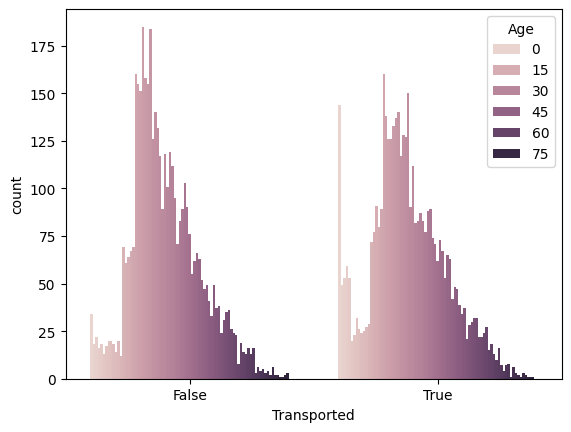

In [189]:
sns.countplot(x="Transported",hue="Age",data=Train)


<Axes: xlabel='HomePlanet', ylabel='count'>

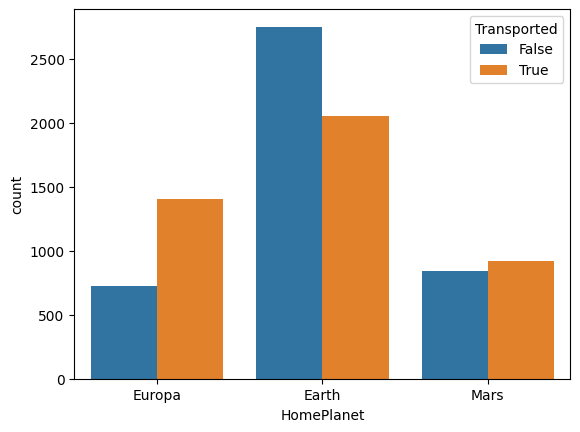

In [190]:
sns.countplot(x="HomePlanet",hue="Transported",data=Train)

<Axes: xlabel='VIP', ylabel='count'>

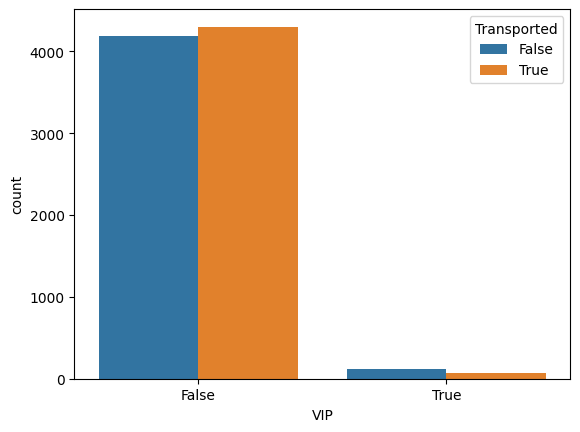

In [191]:
sns.countplot(x="VIP",hue="Transported",data=Train)

In [192]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

scaler=StandardScaler()
encoder=LabelEncoder()

Train[cat_cols_train]=Train[cat_cols_train].apply(encoder.fit_transform)
Test[cat_cols_test]=Test[cat_cols_test].apply(encoder.fit_transform)


In [204]:


X=Train[Train.columns[:-1]].values
y=Train[Train.columns[-1]].values.astype(int)

X=scaler.fit_transform(X)
Test=scaler.fit_transform(Test)


In [205]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [208]:
import tensorflow as tf


(6954, 11)

In [209]:
model=tf.keras.Sequential([
tf.keras.layers.Dense(32,activation='relu',input_shape=(11,)),
tf.keras.layers.Dropout(0.02),
tf.keras.layers.Dense(32,activation='relu'),
tf.keras.layers.Dropout(0.02),
tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=32,validation_split=0.2,epochs=1000)

Epoch 1/1000


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7381 - loss: 0.5128 - val_accuracy: 0.8037 - val_loss: 0.4238
Epoch 2/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7926 - loss: 0.4315 - val_accuracy: 0.7965 - val_loss: 0.4259
Epoch 3/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7901 - loss: 0.4454 - val_accuracy: 0.8009 - val_loss: 0.4058
Epoch 4/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7887 - loss: 0.4396 - val_accuracy: 0.8124 - val_loss: 0.4070
Epoch 5/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7951 - loss: 0.4305 - val_accuracy: 0.8073 - val_loss: 0.4014
Epoch 6/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.4109 - val_accuracy: 0.8023 - val_loss: 0.3993
Epoch 7/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8059 - loss: 0.4172 - val_accuracy: 0.8001 - val_loss: 0.4008
Epoch 8/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 0.4081 - val_accuracy:

In [197]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5).astype(int)
print(classification_report(y_test,y_pred))

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       861
           1       0.74      0.85      0.79       878

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739



In [212]:
Test.shape
X_train.shape

(6954, 11)

In [223]:
nn_sub=model.predict(Test)
nn_sub=(nn_sub).astype(bool).reshape(-1,)


134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [224]:
sub=pd.read_csv('Dataset/SpaceShip/sample_submission.csv')
sub['Transported'] = nn_sub # Best solo Submission (Top 5% LB)
sub.to_csv('nn_submission.csv', index=False)
sub.head(10)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True


In [225]:
from sklearn.tree import DecisionTreeClassifier

Tree_model=DecisionTreeClassifier()
Tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [226]:
y_pred=Tree_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       861
           1       0.75      0.74      0.75       878

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739



In [229]:
result=Tree_model.predict(Test).astype(bool)

sub=pd.read_csv('Dataset/SpaceShip/sample_submission.csv')
sub['Transported'] = result # Best solo Submission (Top 5% LB)
sub.to_csv('nn_submission.csv', index=False)
sub.head(10)



,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,False
6,0029_01,False
7,0032_01,True
8,0032_02,True
9,0033_01,True
